In [1]:
from yugiquery import *
header('Sets')

<div align='center'>
    <br>
    <!-- Pre Style needed to fix HTML formatting -->
    <pre style="line-height: var(--jp-code-line-height); font-family: var(--jp-code-font-family)">
    ██    ██ ██    ██  ██████  ██  ██████  ██    ██ ███████ ██████  ██    ██ 
     ██  ██  ██    ██ ██       ██ ██    ██ ██    ██ ██      ██   ██  ██  ██  
      ████   ██    ██ ██   ███ ██ ██    ██ ██    ██ █████   ██████    ████   
       ██    ██    ██ ██    ██ ██ ██ ▄▄ ██ ██    ██ ██      ██   ██    ██    
       ██     ██████   ██████  ██  ██████   ██████  ███████ ██   ██    ██    
                                      ▀▀                                     
    </pre>
</div>
<div align='right'>
    Sets - Execution started 22/01/2023 21:56 UTC <br>
    By <b>Guilherme Ruiz</b>
</div>

---

Table of Contents
=================

*   [1  Data aquisition](#Data-aquisition)
    *   [1.1  Fetch set lists](#Fetch-set-lists)
    *   [1.2  Fetch set properties](#Fetch-set-properties)
    *   [1.3  Merge data](#Merge-data)
    *   [1.4  Save data](#Save-data)
*   [3  Check changes](#Check-changes)
    *   [3.1  Load previous data](#Load-previous-data)
    *   [3.2  Generate changelog](#Generate-changelog)
*   [4  Data visualization](#Data-visualization)
    *   [4.1  Full data](#Full-data)
    *   [4.2  Set](#Set)
    *   [4.3  Card number](#Card-number)
    *   [4.4  Name](#Name)
    *   [4.5  Rarity](#Rarity)
        *   [4.5.1  By unique](#By-unique)
        *   [4.5.2  By combination](#By-combination)
    *   [4.6  Print](#Print)
    *   [4.7  Quantity](#Quantity)
    *   [4.8  Region](#Region)
    *   [4.9  Cover card](#Cover-card)
    *   [4.10  Series](#Series)
    *   [4.11  Set type](#Set-type)
    *   [4.12  Release](#Release)
        *   [4.12.1  By year](#By-year)
        *   [4.12.2  By month](#By-month)
        *   [4.12.3  By day](#By-day)
        *   [4.12.4  By region](#By-region)
        *   [4.12.5  By series](#By-series)
        *   [4.12.6  By set type](#By-set-type)
*   [5  Debug](#Debug)
    *   [5.1  Has nan name/number](#Has-nan-name/number)
    *   [5.2  Has nan rarity](#Has-nan-rarity)
    *   [5.3  Has quantity as print](#Has-quantity-as-print)
    *   [5.4  Has nan release](#Has-nan-release)
    *   [5.5  Has print as rarity](#Has-print-as-rarity)
    *   [5.6  Merge failed](#Merge-failed)
*   [6  Epilogue](#Epilogue)
    *   [6.1  HTML export](#HTML-export)
<!-- *   [6.2  Git](#Git) -->

# Data aquisition

## Fetch set lists

In [2]:
# Timestamp
timestamp = pd.Timestamp.now()

all_set_lists_df = fetch_all_set_lists()

  0%|          | 0/80 [00:00<?, ?it/s]

4120 set lists received - 76 errors


## Fetch set properties

In [3]:
# List of sets to ask
sets = all_set_lists_df['Set'].unique()  
set_info_df = fetch_set_info(sets)

  0%|          | 0/96 [00:00<?, ?it/s]

1430 set properties received - 3 errors


## Merge data

In [4]:
# Add properties to set lists
all_set_lists_df = merge_set_info(all_set_lists_df,set_info_df)

Set properties merged


## Save data

In [5]:
all_set_lists_df.drop('_merge', axis=1).to_csv(f'../data/all_sets_{int(timestamp.timestamp())}.csv', index = False)
print('Data saved')

Data saved


# Check changes

## Load previous data

In [6]:
# Get list of files
files_list = sorted(glob.glob('../data/all_sets_*.csv'), key=os.path.getctime, reverse=True)
# Get second newest file if exist
if len(files_list)>1:
    # Load csv avoiding converting "NA" to NaN and force dtypes to match current df
    previous_df = pd.read_csv(files_list[1], dtype=object, keep_default_na=False, na_values=[''])
    # Correct tuples
    previous_df['Rarity'] = previous_df['Rarity'].dropna().apply(literal_eval)
    previous_df['Cover card'] = previous_df['Cover card'].dropna().apply(literal_eval)
    # Force dtypes to match current df
    previous_df = previous_df.astype(all_set_lists_df[previous_df.columns].dtypes.to_dict())
    print('File loaded')
else:
    previous_df = None
    print('No older files')

File loaded


## Generate changelog

In [7]:
if previous_df is None:
    print('Skipped')
else:
    changelog = generate_changelog(previous_df, all_set_lists_df.drop('_merge', axis=1), col = 'Card number')
    if not changelog.empty:
        display(changelog)
        changelog.to_csv(f'../data/sets_changelog_{timestamp.strftime("%Y%m%d")}.csv', index = True)
        print('Changelog saved')

Print    Release Version
Card number                         
CBLZ-SP000   <NA>        NaT     Old
CBLZ-SP000   <NA> 2013-01-24     New
CBLZ-SP001   <NA>        NaT     Old
CBLZ-SP001   <NA> 2013-01-24     New
CBLZ-SP002   <NA>        NaT     Old
...           ...        ...     ...
CL03-SC188   <NA> 2023-02-25     Old
CL03-SC189        2023-02-25     New
CL03-SC189   <NA> 2023-02-25     Old
CL03-SC190   <NA> 2023-02-25     Old
CL03-SC190        2023-02-25     New

[510 rows x 3 columns]

Changelog saved


# Data visualization

## Full data

In [56]:
all_set_lists_df


KeyboardInterrupt

KeyboardInterrupt



Full data available [here](../data)

## Set

In [9]:
print('Total number of sets:', all_set_lists_df['Set'].nunique())

Total number of sets: 1435


In [10]:
all_set_lists_df.groupby('Set', dropna=False).nunique()

Card number  Name  Rarity  \
Set                                                                             
"Amabie-San" Present Campaign                                 2     1       1   
"Blue-Eyes White Dragon Rush Rare Special Red V...            2     1       1   
"Blue-Eyes White Dragon Secret Rare Special Blu...            1     1       1   
"Blue-Eyes White Dragon" 20th Anniversary Gold ...            0     1       0   
"Blue-Eyes White Dragon" 20th Anniversary Silve...            0     1       0   
...                                                         ...   ...     ...   
Yu-Gi-Oh! ZEXAL World Duel Carnival Duel Champi...            1     1       1   
Yu-Gi-Oh! ZEXAL World Duel Carnival promotional...           18     3       1   
Yugi's Legendary Decks                                      650   112       3   
Zexal Collection Tin                                        120    24       3   
Zombie World Structure Deck                                 185    37       2   

                                                    Print  Quantity  Region  \
Set                                                                           
"Amabie-San" Present Campaign                           0         0       1   
"Blue-Eyes White Dragon Rush Rare Special Red V...      0         0       2   
"Blue-Eyes White Dragon Secret Rare Special Blu...      0         0       1   
"Blue-Eyes White Dragon" 20th Anniversary Gold ...      0         0       1   
"Blue-Eyes White Dragon" 20th Anniversary Silve...      0         0       1   
...                                                   ...       ...     ...   
Yu-Gi-Oh! ZEXAL World Duel Carnival Duel Champi...      0         0       1   
Yu-Gi-Oh! ZEXAL World Duel Carnival promotional...      0         0       6   
Yugi's Legendary Decks                                  0         0       5   
Zexal Collection Tin                                    0         0       5   
Zombie World Structure Deck                             0         2       5   

                                                    Release  Series  Set type  \
Set                                                                             
"Amabie-San" Present Campaign                             1       0         1   
"Blue-Eyes White Dragon Rush Rare Special Red V...        2       0         1   
"Blue-Eyes White Dragon Secret Rare Special Blu...        1       0         1   
"Blue-Eyes White Dragon" 20th Anniversary Gold ...        1       0         1   
"Blue-Eyes White Dragon" 20th Anniversary Silve...        1       0         1   
...                                                     ...     ...       ...   
Yu-Gi-Oh! ZEXAL World Duel Carnival Duel Champi...        1       0         1   
Yu-Gi-Oh! ZEXAL World Duel Carnival promotional...        2       0         1   
Yugi's Legendary Decks                                    2       0         1   
Zexal Collection Tin                                      1       0         1   
Zombie World Structure Deck                               1       0         1   

                                                    Cover card  Page URL  \
Set                                                                        
"Amabie-San" Present Campaign                                0         1   
"Blue-Eyes White Dragon Rush Rare Special Red V...           0         1   
"Blue-Eyes White Dragon Secret Rare Special Blu...           0         1   
"Blue-Eyes White Dragon" 20th Anniversary Gold ...           0         1   
"Blue-Eyes White Dragon" 20th Anniversary Silve...           0         1   
...                                                        ...       ...   
Yu-Gi-Oh! ZEXAL World Duel Carnival Duel Champi...           0         1   
Yu-Gi-Oh! ZEXAL World Duel Carnival promotional...           0         1   
Yugi's Legendary Decks                                       0         1   
Zexal Collection Tin                                         1         1   
Zomb

In [11]:
all_set_lists_df.groupby('Set', dropna=False).nunique().describe()

Card number         Name       Rarity        Print     Quantity  \
count  1435.000000  1435.000000  1435.000000  1435.000000  1435.000000   
mean    107.214634    27.544251     2.429965     0.349826     0.099652   
std     236.083779    45.354992     2.329801     0.814096     0.456435   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.000000     1.000000     1.000000     0.000000     0.000000   
50%      10.000000     5.000000     1.000000     0.000000     0.000000   
75%      86.000000    40.500000     3.000000     0.000000     0.000000   
max    1652.000000   307.000000    17.000000     6.000000     3.000000   

            Region      Release       Series     Set type   Cover card  \
count  1435.000000  1435.000000  1435.000000  1435.000000  1435.000000   
mean      2.696864     1.455052     0.390941     0.953310     0.310801   
std       2.298980     0.997155     0.488131     0.211047     0.462983   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.000000     1.000000     0.000000     1.000000     0.000000   
50%       1.000000     1.000000     0.000000     1.000000     0.000000   
75%       5.000000     2.000000     1.000000     1.000000     1.000000   
max      10.000000     9.000000     1.000000     1.000000     1.000000   

          Page URL  Modification date  _merge  
count  1435.000000        1435.000000  1435.0  
mean      0.994425           0.994425     1.0  
std       0.074483           0.074483     0.0  
min       0.000000           0.000000     1.0  
25%       1.000000           1.000000     1.0  
50%       1.000000           1.000000     1.0  
75%       1.000000           1.000000     1.0  
max       1.000000           1.000000     1.0

## Card number

In [12]:
print('Total number of card numbers:', all_set_lists_df['Card number'].nunique())

Total number of card numbers: 151987


In [13]:
all_set_lists_df.groupby('Card number', dropna=False).nunique()

Set  Name  Rarity  Print  Quantity  Region  Release  Series  \
Card number                                                                
15AX-JP000     2     1       1      1         0       1        1       0   
15AX-JPM01     1     1       1      1         0       1        1       0   
15AX-JPM02     1     1       1      1         0       1        1       0   
15AX-JPM03     1     1       1      1         0       1        1       0   
15AX-JPM04     1     1       1      1         0       1        1       0   
...          ...   ...     ...    ...       ...     ...      ...     ...   
ZTIN-SP021     1     1       1      0         0       1        1       0   
ZTIN-SPV01     1     1       1      0         0       1        1       0   
ZTIN-SPV02     1     1       1      0         0       1        1       0   
ZTIN-SPV03     1     1       1      0         0       1        1       0   
<NA>          44   406       6      2         0      10       40       6   

             Set type  Cover card  Page URL  Modification date  _merge  
Card number                                                             
15AX-JP000          1           0         2                  2       1  
15AX-JPM01          1           0         1                  1       1  
15AX-JPM02          1           0         1                  1       1  
15AX-JPM03          1           0         1                  1       1  
15AX-JPM04          1           0         1                  1       1  
...               ...         ...       ...                ...     ...  
ZTIN-SP021          1           1         1                  1       1  
ZTIN-SPV01          1           1         1                  1       1  
ZTIN-SPV02          1           1         1                  1       1  
ZTIN-SPV03          1           1         1                  1       1  
<NA>               11           6        43                 43       3  

[151988 rows x 13 columns]

## Name

In [14]:
print('Total number of card names:', all_set_lists_df['Name'].nunique())

Total number of card names: 12579


In [15]:
all_set_lists_df.groupby('Name', dropna=False).nunique()

Set  Card number  Rarity  Print  Quantity  \
Name                                                                       
"A Legendary Ocean"              1            1       0      0         0   
"A" Cell Breeding Device         4            9       1      1         0   
"A" Cell Incubator               2            8       1      2         0   
"A" Cell Recombination Device    1            8       1      0         0   
"A" Cell Scatter Burst           3            9       1      1         0   
...                            ...          ...     ...    ...       ...   
Zubaba Knight                   12           50       5      1         1   
Zubababancho Gagagacoat          1            2       1      1         0   
Zure, Knight of Dark World       8           24       1      1         1   
Zushin the Sleeping Giant        3           14       3      1         0   
<NA>                             9          182       3      1         0   

                               Region  Release  Series  Set type  Cover card  \
Name                                                                           
"A Legendary Ocean"                 1        1       0         1           1   
"A" Cell Breeding Device            7        6       1         2           3   
"A" Cell Incubator                  7        6       1         1           2   
"A" Cell Recombination Device       8        4       1         1           1   
"A" Cell Scatter Burst              7        6       1         1           3   
...                               ...      ...     ...       ...         ...   
Zubaba Knight                       8       23       2         2           7   
Zubababancho Gagagacoat             2        2       1         1           1   
Zure, Knight of Dark World         10       14       1         4           4   
Zushin the Sleeping Giant           8        4       1         2           3   
<NA>                                9       12       4         4           4   

                               Page URL  Modification date  _merge  
Name                                                                
"A Legendary Ocean"                   1                  1       1  
"A" Cell Breeding Device              4                  4       1  
"A" Cell Incubator                    2                  2       1  
"A" Cell Recombination Device         1                  1       1  
"A" Cell Scatter Burst                3                  3       1  
...                                 ...                ...     ...  
Zubaba Knight                        12                 12       1  
Zubababancho Gagagacoat               1                  1       1  
Zure, Knight of Dark World            8                  8       1  
Zushin the Sleeping Giant             3                  3       1  
<NA>                                  9                  9       2  

[12580 rows x 13 columns]

In [16]:
all_set_lists_df.groupby('Name', dropna=True).nunique().describe()

Set   Card number        Rarity         Print      Quantity  \
count  12579.000000  12579.000000  12579.000000  12579.000000  12579.000000   
mean       3.142221     12.069401      2.071786      0.670721      0.112330   
std        3.514576     11.604525      1.494203      0.673424      0.342361   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.000000      7.000000      1.000000      0.000000      0.000000   
50%        2.000000      9.000000      2.000000      1.000000      0.000000   
75%        4.000000     14.000000      3.000000      1.000000      0.000000   
max       80.000000    275.000000     28.000000      4.000000      3.000000   

             Region       Release        Series      Set type    Cover card  \
count  12579.000000  12579.000000  12579.000000  12579.000000  12579.000000   
mean       6.893871      5.982829      1.089912      1.473567      1.843469   
std        2.561741      5.903301      0.787852      0.937376      1.841657   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.000000      3.000000      1.000000      1.000000      1.000000   
50%        8.000000      4.000000      1.000000      1.000000      1.000000   
75%        8.000000      7.000000      1.000000      2.000000      2.000000   
max       15.000000    122.000000     12.000000     16.000000     41.000000   

           Page URL  Modification date        _merge  
count  12579.000000       12579.000000  12579.000000  
mean       3.130933           3.130933      1.010812  
std        3.493939           3.493939      0.103420  
min        0.000000           0.000000      1.000000  
25%        1.000000           1.000000      1.000000  
50%        2.000000           2.000000      1.000000  
75%        4.000000           4.000000      1.000000  
max       80.000000          80.000000      2.000000

## Rarity

In [17]:
print('Total number of rarities:', all_set_lists_df['Rarity'].explode().nunique())

Total number of rarities: 55


### By unique

In [18]:
all_set_lists_df.explode('Rarity').groupby('Rarity', dropna = False).nunique()

Set  Card number  Name  Print  \
Rarity                                                                   
10000 Secret Rare                          2            7     1      1   
20th Secret Rare                          16          135   134      3   
@released::(from July 17)                  1            1     1      0   
@released::(from July 31)                  1            1     1      0   
@released::(from September 18)             1            2     1      0   
Collector's Rare                           6          301    76      2   
Collectors Rare                            8          112   112      2   
Common                                   556        76875  8562      6   
Duel Terminal Normal Parallel Rare        38         1906   511      2   
Duel Terminal Normal Rare Parallel Rare    5           15    15      0   
Duel Terminal Rare Parallel Rare          34          368   141      2   
Duel Terminal Secret Parallel Rare        16          103    55      1   
Duel Terminal Super Parallel Rare         34          240    85      2   
Duel Terminal Ultra Parallel Rare         42          371    87      2   
Extra Secret Parallel Rare                 3           10     6      0   
Extra Secret Rare                         24           77    50      1   
Ghost Rare                                35          255    47      3   
Ghost/Gold Rare                            1           30     6      0   
Gold Rare                                 23         2057   363      2   
Gold Rush Rare                             2           16    16      2   
Gold Secret Rare                           8          644   154      2   
Holographic Parallel Rare                  2            2     2      1   
Holographic Rare                          68          123    65      2   
Kaiba Corporation Common                  10           10    10      0   
Kaiba Corporation Rare                     5            5     5      0   
Kaiba Corporation Ultra Rare               3            3     3      0   
Millennium Gold Rare                       2            9     6      2   
Millennium Rare                            8          316   152      3   
Millennium Secret Rare                     1            4     2      1   
Millennium Super Rare                      1           40    20      1   
Millennium Ultra Rare                      1           16     8      1   
Mosaic Rare                                1         1290   215      0   
New                                        2            1    18      1   
Normal Parallel Rare                     131         2071   994      4   
Normal Rare                               81          575   299      2   
Orr                                        1            1     1      0   
Platinum Secret Rare                       2           24     4      0   
Prismatic Secret Rare                     40         1391   367      3   
Rare                                     249        18683  3500      7   
Reprint                                    6            0    35      0   
Rr                                         1            4     4      0   
Rush Rare                                 15          102    47      0   
Secret Parallel Rare                       2           12     6      1   
Secret Rare                              373        10358  2293     11   
Shatterfoil Rare                           4         1482   292      0   
Short Print                               56         1316   234      3   
Starfoil Rare                              6         2019   380      0   
Starlight Rare                            12          316    56      2   
Super Parallel Rare                        6          154    82      3   
Super Rare                               585        20264  3888      9   
Super Short Print                          1           35     5      1   
Ultimate Rare                            115         4315   847      2   
Ultra Parallel Rare                       67 

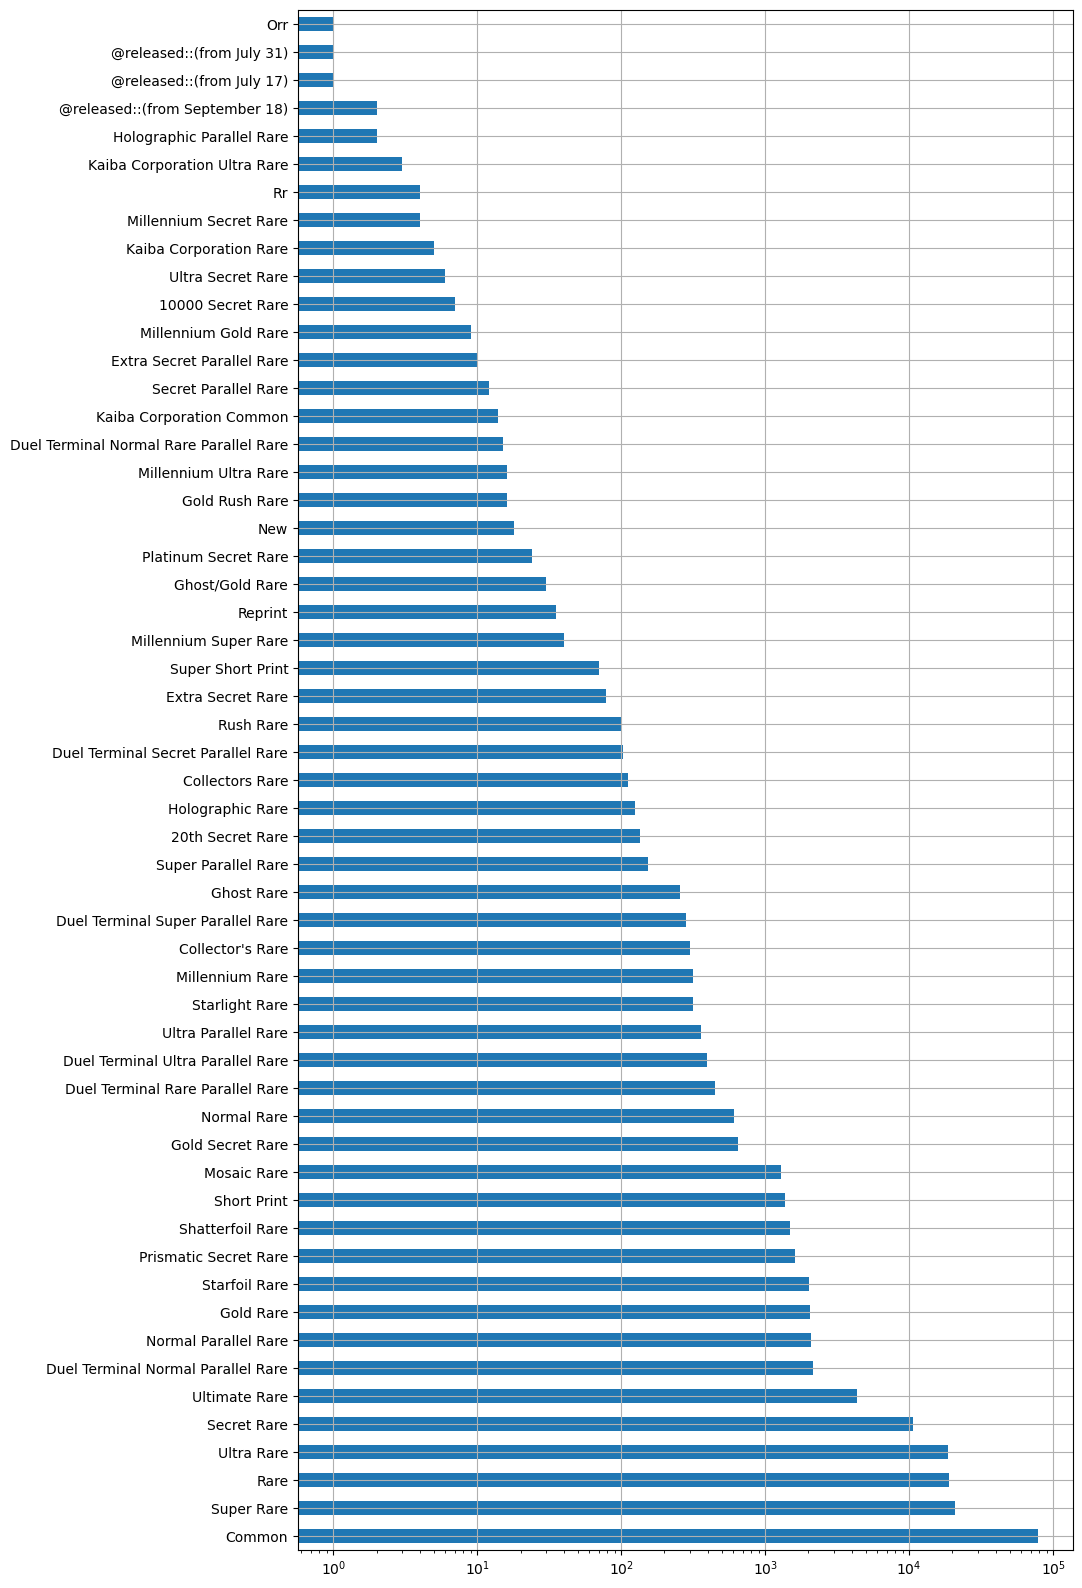

In [19]:
all_set_lists_df['Rarity'].explode().value_counts().plot.barh(figsize = (10,20), grid=True)
plt.xscale('log')
plt.show()

### By combination

In [20]:
all_set_lists_df.groupby('Rarity', dropna = False).nunique()

Set  Card number  Name  \
Rarity                                                                     
(10000 Secret Rare,)                                2            7     1   
(20th Secret Rare,)                                 9           25    24   
(@released::(from July 17),)                        1            1     1   
(@released::(from July 31),)                        1            1     1   
(@released::(from September 18),)                   1            2     1   
...                                               ...          ...   ...   
(Ultra Rare, Ultimate Rare, Ultra Parallel Rare)    1            1     1   
(Ultra Rare, Ultra Parallel Rare)                  22           71    67   
(Ultra Rare, Ultra Parallel Rare, Ultimate Rare)    5            5     5   
(Ultra Secret Rare,)                                1            0     6   
NaN                                                36          385   367   

                                                  Print  Quantity  Region  \
Rarity                                                                      
(10000 Secret Rare,)                                  1         0       7   
(20th Secret Rare,)                                   1         0       1   
(@released::(from July 17),)                          0         0       1   
(@released::(from July 31),)                          0         0       1   
(@released::(from September 18),)                     0         0       1   
...                                                 ...       ...     ...   
(Ultra Rare, Ultimate Rare, Ultra Parallel Rare)      0         0       1   
(Ultra Rare, Ultra Parallel Rare)                     0         0       1   
(Ultra Rare, Ultra Parallel Rare, Ultimate Rare)      0         0       1   
(Ultra Secret Rare,)                                  0         0       1   
NaN                                                   3         0       6   

                                                  Release  Series  Set type  \
Rarity                                                                        
(10000 Secret Rare,)                                    2       1         1   
(20th Secret Rare,)                                     8       2         3   
(@released::(from July 17),)                            0       0         0   
(@released::(from July 31),)                            0       0         0   
(@released::(from September 18),)                       0       0         0   
...                                                   ...     ...       ...   
(Ultra Rare, Ultimate Rare, Ultra Parallel Rare)        1       1         1   
(Ultra Rare, Ultra Parallel Rare)                      16       3         2   
(Ultra Rare, Ultra Parallel Rare, Ultimate Rare)        3       2         1   
(Ultra Secret Rare,)                                    1       1         1   
NaN                                                    30       5         9   

                                                  Cover card  Page URL  \
Rarity                                                                   
(10000 Secret Rare,)                                       2         2   
(20th Secret Rare,)                                        1         9   
(@released::(from July 17),)                               0         1   
(@released::(from July 31),)                               0         1   
(@released::(from September 18),)                          0         1   
...                                                      ...       ...   
(Ultra Rare, Ultimate Rare, Ultra Parallel Rare)           1         1   
(Ultra Rare, Ultra Parallel Rare)                         16        21   
(Ultra Rare, Ultra Parallel Rare, Ultimate Rare)           3         5   
(Ultra Secret Rare,)                                       0         1   
NaN                                                        4        35   

                                                  Modification date 

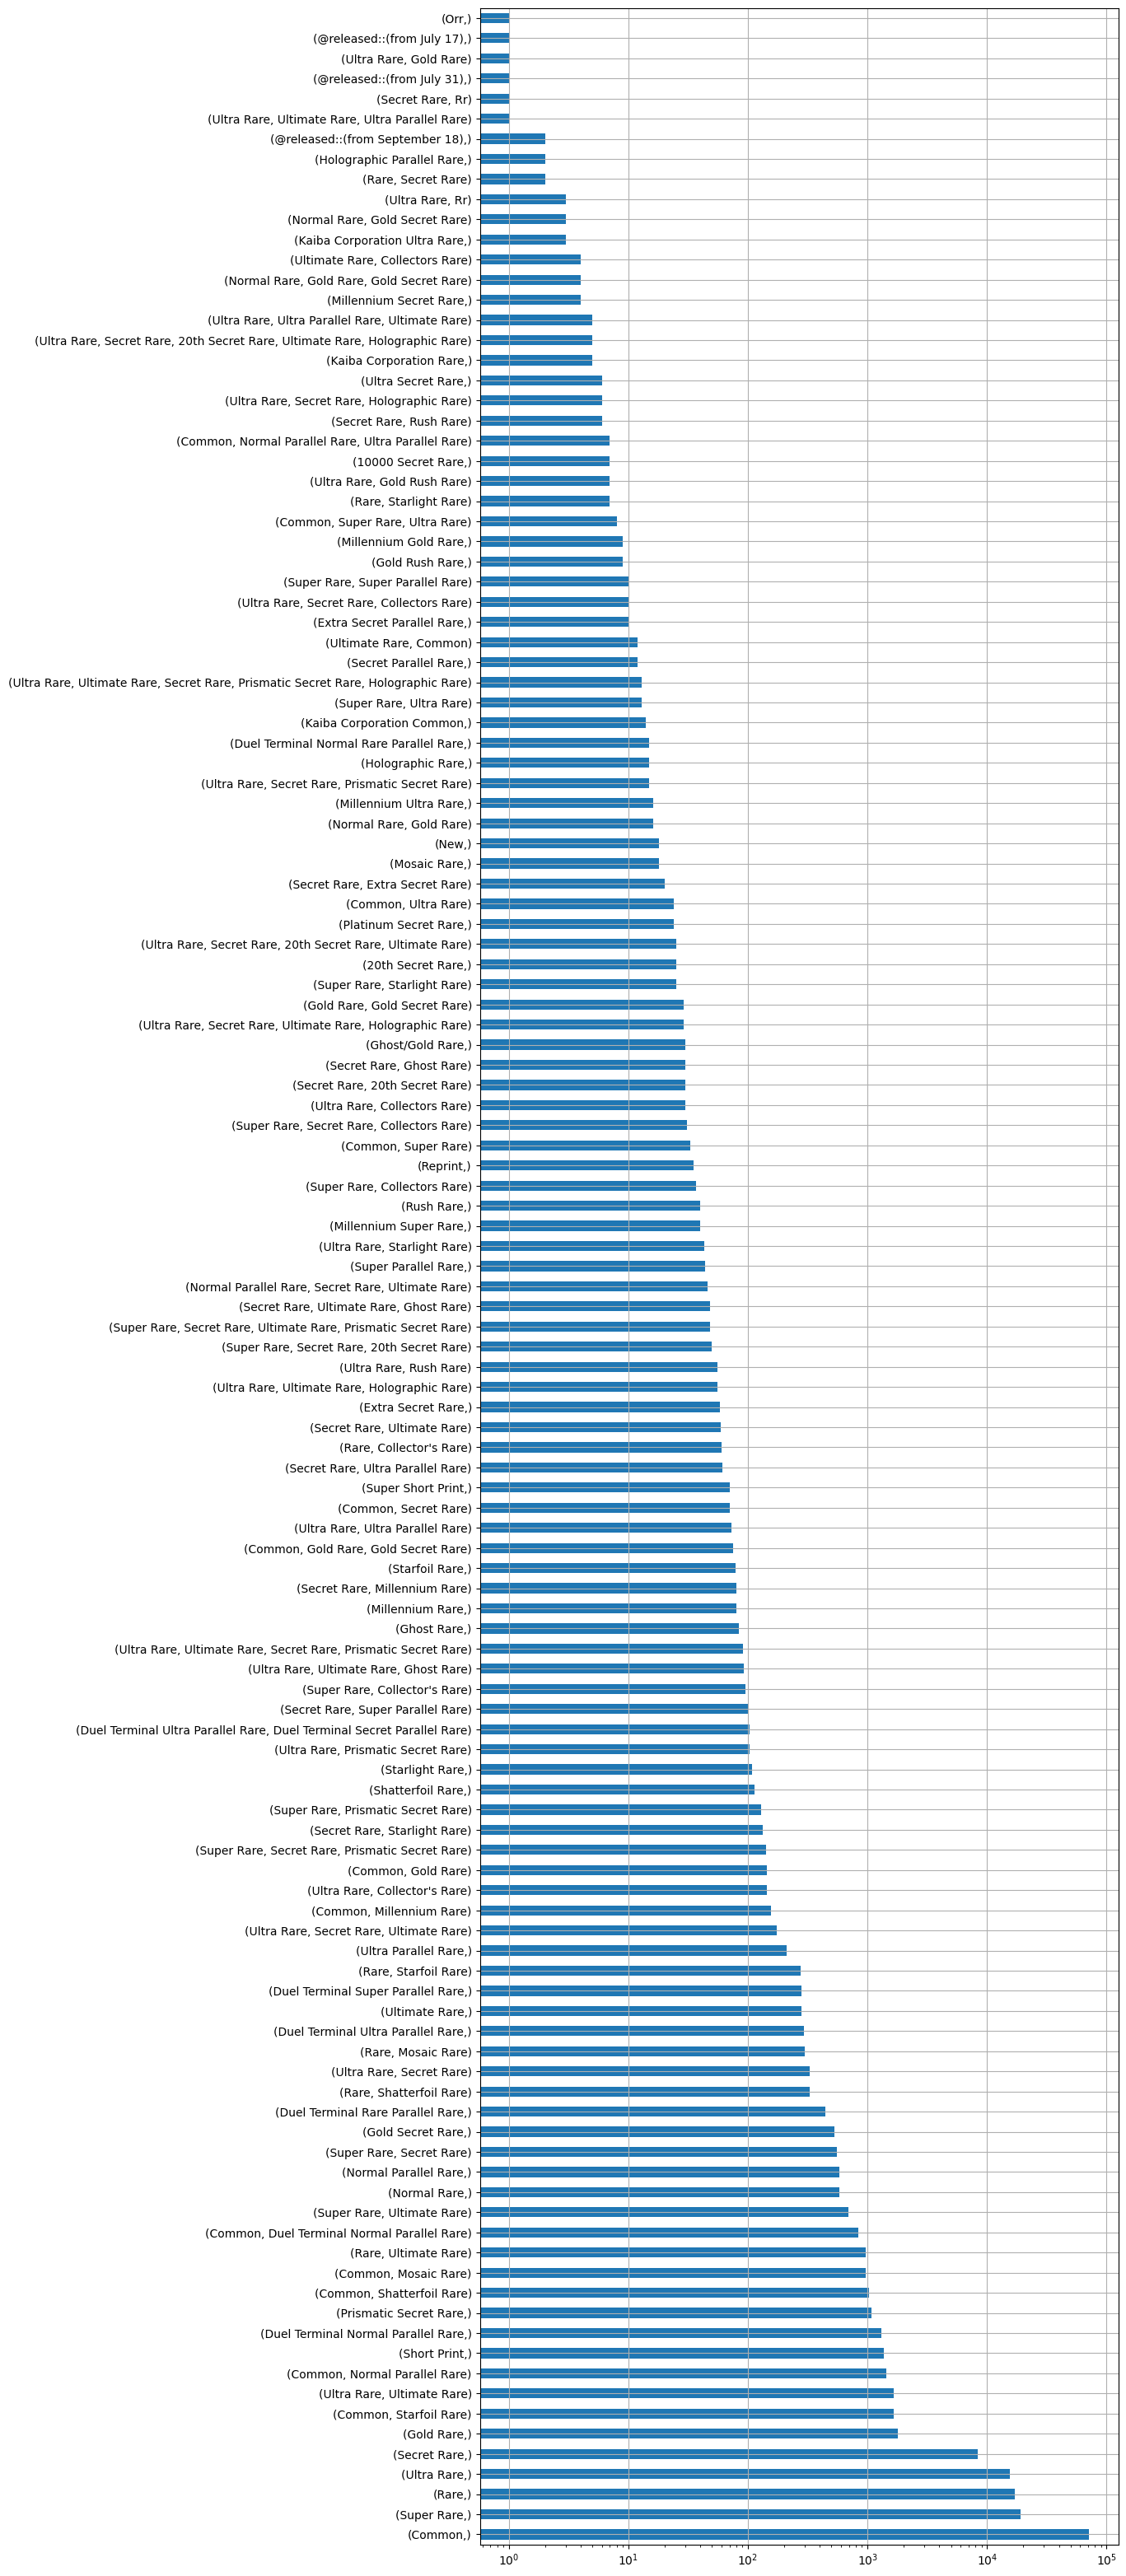

In [21]:
all_set_lists_df['Rarity'].value_counts().plot.barh(figsize = (10,40), grid=True)
plt.xscale('log')
plt.show()

## Print

In [22]:
print('Total number of prints:', all_set_lists_df['Print'].nunique())

Total number of prints: 18


In [23]:
all_set_lists_df.groupby('Print', dropna=False).nunique()

Set  Card number   Name  Rarity  Quantity  \
Print                                                                     
                                1          155      0       0         0   
2                               1            0      1       0         0   
American debut                  1            3      3       1         0   
European & Oceanian debut       1            6      6       1         0   
European debut                 12          146    146       5         0   
Functional errata               1            2      2       1         0   
New                           226        11750   3867      50         3   
New art                         1            4      2       1         0   
New artwork                    10           74     15       5         0   
New artwork (renamed)           1            3      3       1         0   
North American debut            2            4      4       2         0   
Oceanian debut                  1            1      1       1         0   
Reprint                       223        14034   4287      49         3   
Reprint (New Art)               2            2      1       2         0   
Reprint (functional errata)    15           33     21      10         0   
Reprint (new artwork)           1            1      1       1         0   
Reprint (renamed)               2           76     76       6         0   
TCG legal debut                 1            1      1       1         0   
<NA>                         1355       125869  11478     115         3   

                             Region  Release  Series  Set type  Cover card  \
Print                                                                        
                                  1        1       1         1           0   
2                                 1        1       0         1           1   
American debut                    1        1       0         1           1   
European & Oceanian debut         1        1       0         1           0   
European debut                    2       10       0         2           1   
Functional errata                 1        1       0         1           1   
New                              11      243      18        13         129   
New art                           2        2       0         1           1   
New artwork                       7       12       3         4           4   
New artwork (renamed)             1        1       0         1           0   
North American debut              2        2       0         2           0   
Oceanian debut                    1        1       0         1           0   
Reprint                          11      240      17        12         127   
Reprint (New Art)                 2        2       1         1           1   
Reprint (functional errata)       8       14       3         3           5   
Reprint (new artwork)             1        1       0         1           1   
Reprint (renamed)                 1        2       1         1           0   
TCG legal debut                   1        1       1         1           1   
<NA>                             17     1451      41        37         315   

                             Page URL  Modification date  _merge  
Print                                                             
                                    1                  1       1  
2                                   1                  1       1  
American debut                      1                  1       1  
European & Oceanian debut           1                  1       1  
European debut                     12                 12       1  
Functional errata                   1                  1       1  
New                               224                224       2  
New art                             1                  1       1  
New artwork                        10                 10       1  
New artwork (renamed)               1                  1       1  
North Ameri

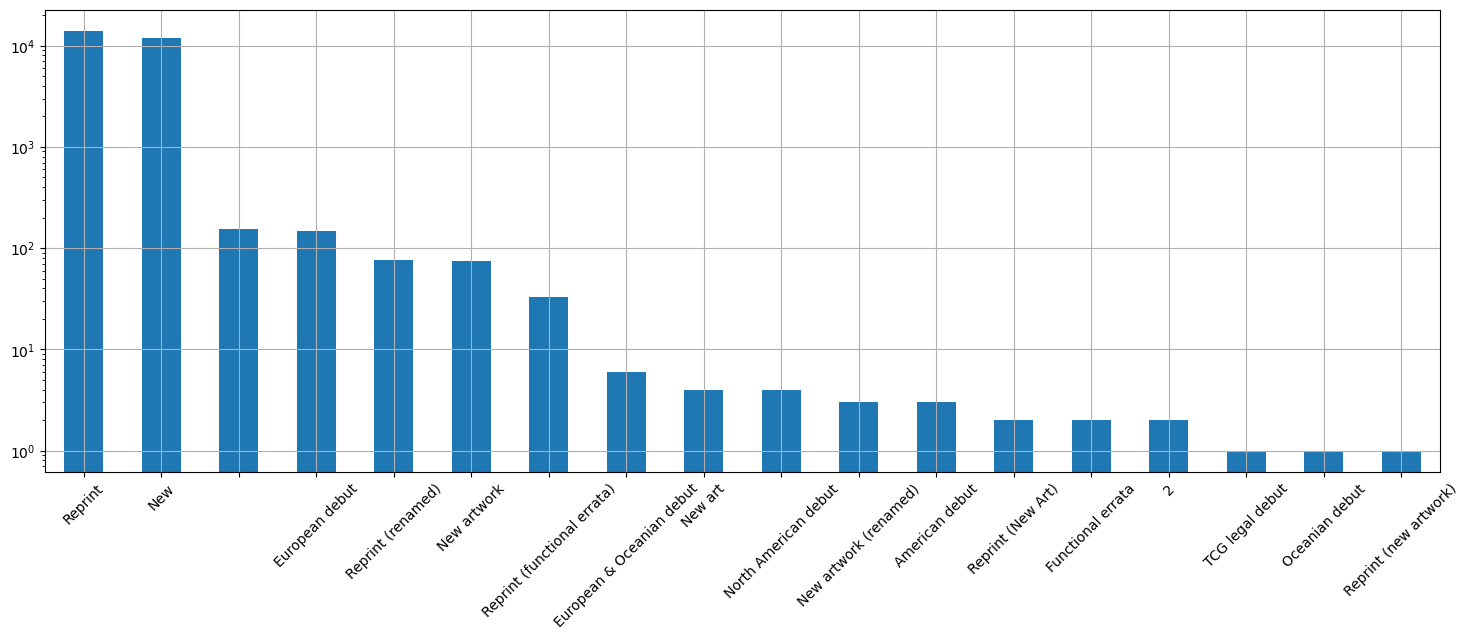

In [24]:
all_set_lists_df['Print'].value_counts().plot.bar(figsize = (18,6), grid=True, rot = 45)
plt.yscale('log')
plt.show()

## Quantity

In [25]:
print('Total number of quantities:', all_set_lists_df['Quantity'].nunique())

Total number of quantities: 3


In [26]:
all_set_lists_df.groupby('Quantity', dropna=False).nunique()

Set  Card number   Name  Rarity  Print  Region  Release  Series  \
Quantity                                                                     
1           67         8858   1215      11      2      11      108       1   
2           66          855    173       4      2      11      108       1   
3           10           74     25       1      2       8       12       0   
<NA>      1370       142212  12469     125     18      17     1501      45   

          Set type  Cover card  Page URL  Modification date  _merge  
Quantity                                                             
1                6          46        66                 66       2  
2                6          45        65                 65       2  
3                4           8        10                 10       1  
<NA>            36         314      1362               1362       3

## Region

In [27]:
print('Total number of regions:', all_set_lists_df['Region'].nunique())

Total number of regions: 17


In [28]:
all_set_lists_df.groupby('Region', dropna=False).nunique()

Set  Card number   Name  Rarity  Print  Quantity  Release  Series  \
Region                                                                      
AE       34         1527   1493      12      0         2       31       2   
AU        2          100     87       3      0         0        1       0   
DE      455        20372  10393      45      4         3      381      12   
EN      657        20183  10480      51     14         3      535      22   
ES        1          100    100       7      0         0        1       1   
EU       25          543    456       8      3         0       16       2   
FC        3          102     87       3      0         0        1       0   
FR      448        19776  10380      46      4         3      375      14   
IT      447        20051  10388      46      4         3      378      12   
JA        3          185    185       8      0         0        3       2   
JP      715        19090  11213      94      7         3      530      28   
KR      383        15937  10755      55      4         3      333      16   
NA       47         1526   1333      10      4         2       39       5   
PT      204        12461   7823      40      4         3      165       8   
SC       23         1237   1038      12      3         0       23       5   
SP      416        19111  10221      45      4         3      355       9   
TC        7          300    286      12      0         2        5       2   
<NA>      2            0      0       0      0         0        0       0   

        Set type  Cover card  Page URL  Modification date  _merge  
Region                                                             
AE             7          19        34                 34       1  
AU             1           2         2                  2       1  
DE            18         219       454                454       2  
EN            23         207       656                656       2  
ES             1           1         1                  1       1  
EU             9           6        25                 25       1  
FC             2           2         3                  3       1  
FR            18         219       447                447       2  
IT            18         218       446                446       2  
JA             2           3         3                  3       1  
JP            28         247       710                710       2  
KR            15         224       378                378       2  
NA            11          12        47                 47       1  
PT            10         120       204                204       1  
SC             1          12        23                 23       1  
SP            17         204       415                415       2  
TC             2           3         7                  7       1  
<NA>           0           0         2                  2       1

In [29]:
all_set_lists_df.groupby('Region', dropna=False).nunique().describe()

Set   Card number          Name     Rarity      Print  \
count   18.000000     18.000000     18.000000  18.000000  18.000000   
mean   215.111111   8477.833333   4817.666667  27.611111   3.055556   
std    252.453581   9290.544746   5018.925453  25.836907   3.489012   
min      1.000000      0.000000      0.000000   0.000000   0.000000   
25%      4.000000    213.750000    210.250000   8.000000   0.000000   
50%     40.500000   1526.500000   1413.000000  12.000000   3.500000   
75%    439.250000  19105.750000  10386.000000  45.750000   4.000000   
max    715.000000  20372.000000  11213.000000  94.000000  14.000000   

        Quantity     Release     Series   Set type  Cover card    Page URL  \
count  18.000000   18.000000  18.000000  18.000000   18.000000   18.000000   
mean    1.666667  176.222222   7.777778  10.166667   95.444444  214.277778   
std     1.414214  203.536543   8.156957   8.759868  105.784032  251.364232   
min     0.000000    0.000000   0.000000   0.000000    0.000000    1.000000   
25%     0.000000    3.500000   2.000000   2.000000    3.000000    4.000000   
50%     2.000000   35.000000   5.000000   9.500000   15.500000   40.500000   
75%     3.000000  370.000000  12.000000  17.750000  215.250000  438.250000   
max     3.000000  535.000000  28.000000  28.000000  247.000000  710.000000   

       Modification date     _merge  
count          18.000000  18.000000  
mean          214.277778   1.388889  
std           251.364232   0.501631  
min             1.000000   1.000000  
25%             4.000000   1.000000  
50%            40.500000   1.000000  
75%           438.250000   2.000000  
max           710.000000   2.000000

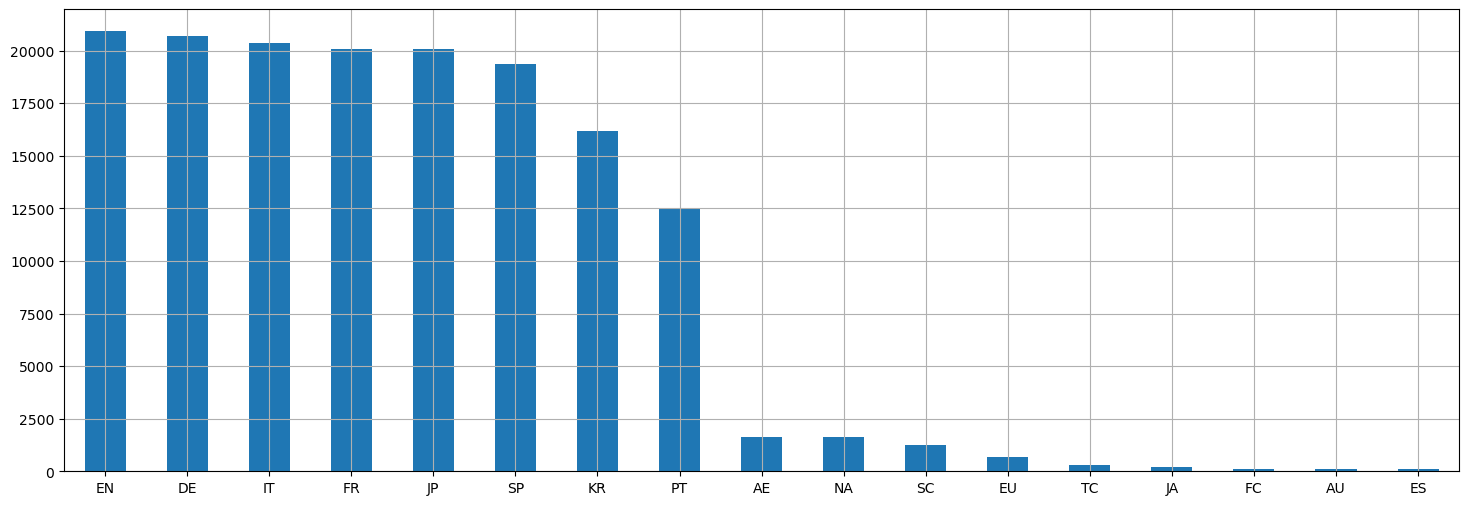

In [30]:
all_set_lists_df['Region'].value_counts().plot.bar(figsize = (18,6), grid=True, rot=0)
plt.show()

## Cover card

In [31]:
print('Total number of cover cards:', all_set_lists_df['Cover card'].explode('Cover card').nunique())

Total number of cover cards: 671


In [32]:
all_set_lists_df.explode('Cover card').groupby('Cover card').nunique()

Set  Card number  Name  Rarity  Print  \
Cover card                                                                
A-to-Z-Dragon Buster Cannon         1          352    54       4      2   
Accel Synchro Stardust Dragon       1          100    50       3      2   
Accesscode Talker                   1          766   101      16      2   
Adamancipator Risen - Dragite       1          135    45       3      2   
Adreus, Keeper of Armageddon        1           84    42       4      0   
...                               ...          ...   ...     ...    ...   
Yamiterasu the Divine Ruler         1          132    66       6      0   
Yoko, the Graceful Mayakashi        2          450    60       4      2   
Yubel - The Ultimate Nightmare      2          560   100      10      0   
Z-Metal Tank                        1           55    55       7      0   
Zerrziel, Ruler of the Evil Eyed    1           90    45       3      2   

                                  Quantity  Region  Release  Series  Set type  \
Cover card                                                                      
A-to-Z-Dragon Buster Cannon              2       8        4       0         1   
Accel Synchro Stardust Dragon            0       2        2       0         1   
Accesscode Talker                        0       8        3       1         1   
Adamancipator Risen - Dragite            0       3        3       0         1   
Adreus, Keeper of Armageddon             0       2        2       0         1   
...                                    ...     ...      ...     ...       ...   
Yamiterasu the Divine Ruler              0       2        2       1         1   
Yoko, the Graceful Mayakashi             0       8        3       0         1   
Yubel - The Ultimate Nightmare           0       6        5       1         2   
Z-Metal Tank                             0       1        1       1         1   
Zerrziel, Ruler of the Evil Eyed         0       2        2       0         1   

                                  Page URL  Modification date  _merge  
Cover card                                                             
A-to-Z-Dragon Buster Cannon              1                  1       1  
Accel Synchro Stardust Dragon            1                  1       1  
Accesscode Talker                        1                  1       1  
Adamancipator Risen - Dragite            1                  1       1  
Adreus, Keeper of Armageddon             1                  1       1  
...                                    ...                ...     ...  
Yamiterasu the Divine Ruler              1                  1       1  
Yoko, the Graceful Mayakashi             2                  2       1  
Yubel - The Ultimate Nightmare           2                  2       1  
Z-Metal Tank                             1                  1       1  
Zerrziel, Ruler of the Evil Eyed         1                  1       1  

[671 rows x 13 columns]

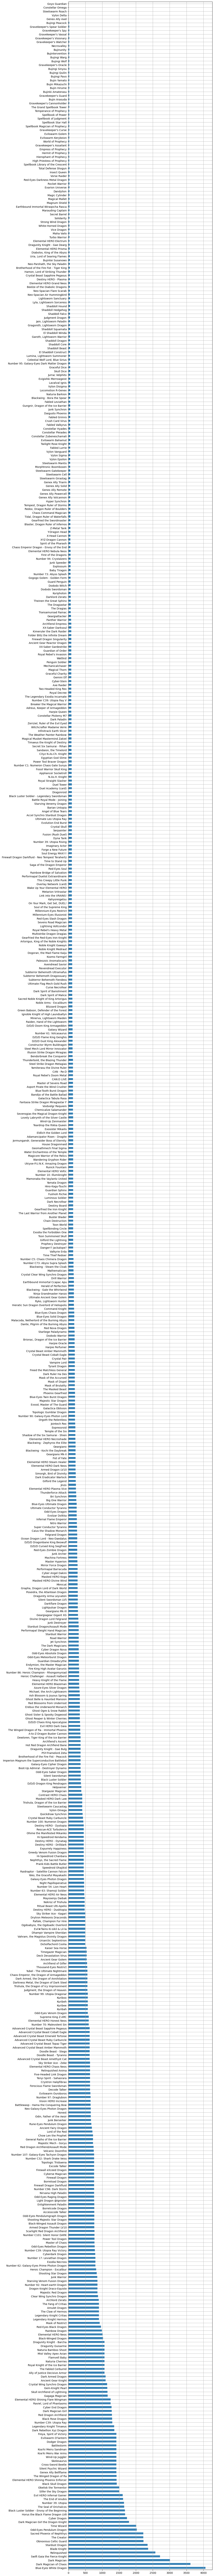

In [33]:
all_set_lists_df['Cover card'].explode().value_counts().plot.barh(figsize = (10,180), grid=True)
plt.show()

## Series

In [34]:
print('Total number of series:', all_set_lists_df['Series'].nunique())

Total number of series: 45


In [35]:
all_set_lists_df.groupby('Series').nunique()

Set  Card number  Name  Rarity  \
Series                                                                        
+1 Bonus Pack                                  7          249   137       3   
Animation Chronicle                            2          200   100       7   
Astral Pack                                    7         1110   184       4   
Attribute Duelist Pack                         4          429   199       6   
Battle Pack (Rush Duel)                        8           80    80       3   
Booster (series)                               4          181   176       8   
Booster pack                                   1           50    50       3   
Champion Pack                                  8          640   161       4   
Classic Pack                                   3          570   415       9   
Collectors Pack                                8          794   374      12   
Core Booster                                  88        49929  7471      39   
Deck Build Pack                                3          360   134       5   
Deck Mod Pack                                 12         1447   756      10   
Duelist Pack                                  21         3739   634       7   
Entry Pack (series)                           10          163   160       3   
Expansion Pack                                 4          280   280       6   
Gold Series (series)                           8         2595   446       9   
Hidden Arsenal (series)                        7         2470   400       2   
Hobby League                                   1           83    43       3   
Jump Victory Carnival                          1            1     1       1   
Legend Duelist (series)                        6          780   343       9   
Legendary Collection (series)                  2           57    19       1   
Master Guide promotional cards (series)        4            8     8       1   
Mattel Action Figure promotional cards         3           17    16       1   
McDonald's Promotional Cards                   2           35    35       4   
Monster Figure Collection promotional cards    3           15    15       1   
OTS Tournament Pack                            2          324    54       4   
Perfect Rulebook promotional cards             3            3     3       2   
Pharaoh Tour promotional cards                 3           20     5       2   
Premium Pack                                  25          452   368       9   
Shonen Jump promotional cards                 78           85    81       2   
Sneak Peek Participation Cards                57          302    61       2   
Star Pack                                      3          900   149       4   
Structure Deck R                               3          248   122       5   
The Valuable Book promotional cards           18           38    38       2   
V Jump August 1999 Special Present             1            0     6       1   
V Jump Edition (series)                        4           16    16       3   
V Jump promotional cards                      78           94    98       5   
Value Box                                      9           11    11       3   
Yu-Gi-Oh! 5D's manga promotional cards         9           19     9       1   
Yu-Gi-Oh! Day promotional cards                7            7     1       1   
Yu-Gi-Oh! GX manga promotional cards           9           19     9       2   
Yu-Gi-Oh! R promotional cards                  4            8     4       2   
Yu-Gi-Oh! World Championship prize cards      13           35    30       5   
Yu-Gi-Oh! ZEXAL manga promotional cards        8           25     8       1   

                                             Print  Quantity  Region  Release  \
Series                                                                          
+1 Bonus Pack                                    0         0       2       12   
Animation Chronicle                              2         0       2        4   
Astral 

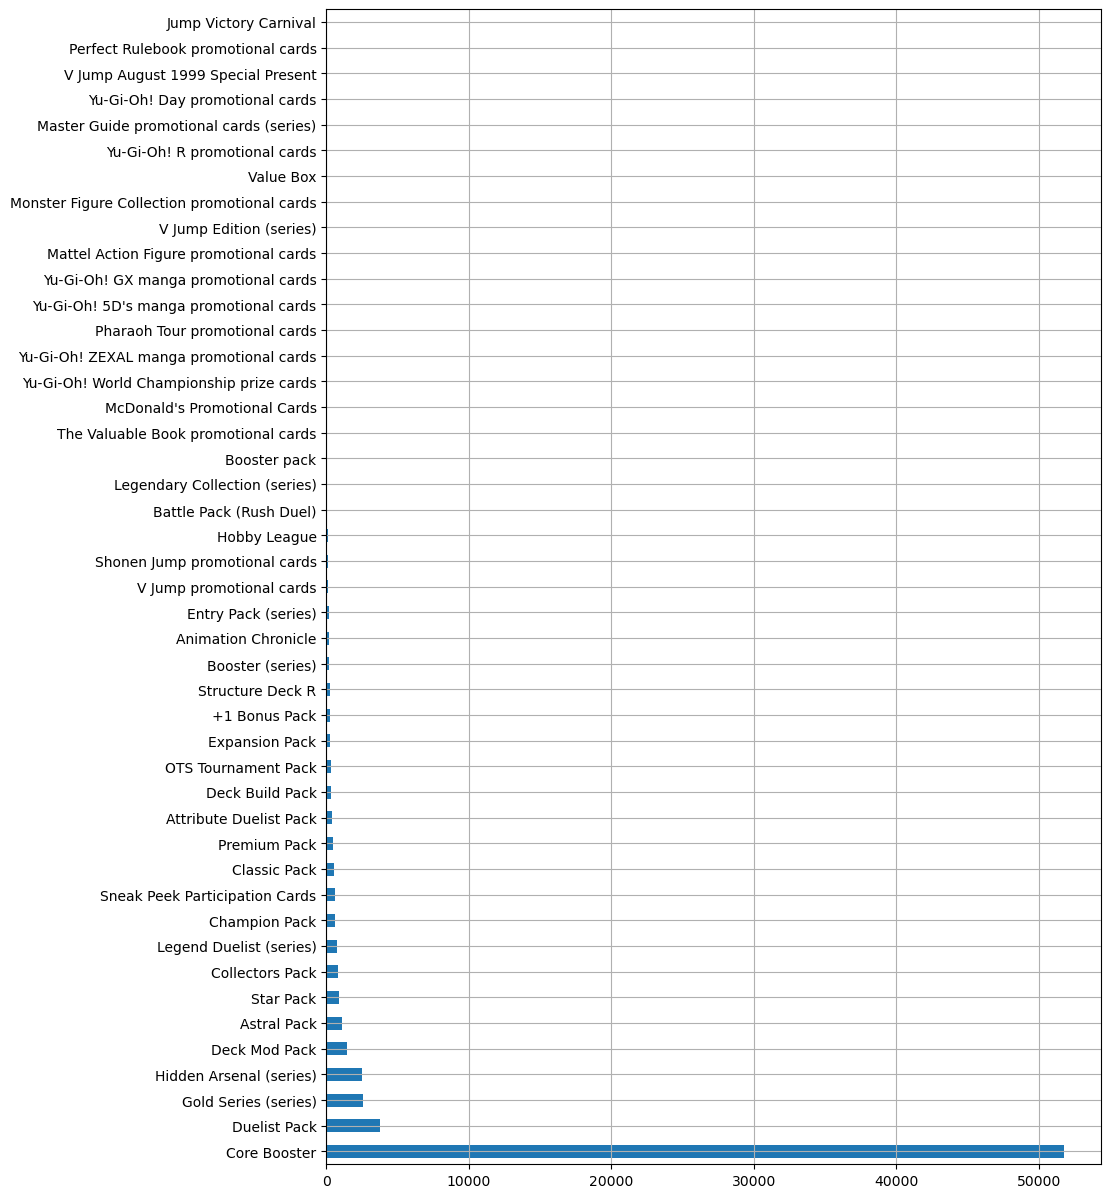

In [36]:
all_set_lists_df['Series'].value_counts().plot.barh(figsize = (10,15), grid=True)
plt.show()

## Set type

In [37]:
print('Total number of set types:', all_set_lists_df['Set type'].nunique())

Total number of set types: 37


In [38]:
all_set_lists_df.groupby('Set type').nunique()

Set  Card number   Name  Rarity  Print  \
Set type                                                                     
Beta set                              1          535    106       1      0   
Binder                                2            6      6       2      2   
Book promotional card                 4            5      5       3      0   
Book promotional cards               26           52     52       4      0   
Booster pack                        467       114012  11764     104     16   
Boss Duel Deck                        1            8      8       1      0   
Bundle                                9           11     11       3      0   
Collectible tin                      53         5901   1005       9      4   
Collector's Set                      11         6226   1102       7      2   
Core Booster                          1          160     80       6      0   
Deluxe Edition                        4          114     19       2      0   
Demo Deck                             4          380     64       1      0   
Duel Disk                             2           16      9       2      2   
Duel Disk promotional cards           5           13     12       4      0   
Duel Terminal                        34         1847    706       6      2   
Duelist League participation cards   10           60     16       3      0   
Duelist Set                           5          312    154       5      0   
Enhancement Pack                      2           20     20       1      0   
Hobby League participation cards     40           83     43       3      0   
Magazine promotional card           167          191    173       9      0   
Magazine promotional cards            4            4      4       1      0   
Main Deck                             2           44     44       2      0   
Manga promotional card               33           74     32       2      0   
Participation card                   60          485    119       5      0   
Preconstructed Deck                   6          401    223      10      3   
Prize card                           16           46     41       5      0   
Prize cards                           1           68     20       1      0   
Promotional card                    140          317    209      18      3   
Promotional cards                    25          200     62       7      2   
Special Edition                      90         1189    289       9      5   
Starter Deck                         38         6777    606      11      3   
Structure Deck                       64         9454   1206       9      2   
Tournament prize card                 1            2      2       1      0   
Tournament promotional card           2            5      2       2      0   
Vendor Edition                        6          210    210       2      0   
Video game promotional card           9           79     39       4      0   
Video games promotional card         23          325     73       4      2   

                                    Quantity  Region  Release  Series  \
Set type                                                                
Beta set                                   2       5        1       0   
Binder                                     0       1        2       0   
Book promotional card                      0       2        4       1   
Book promotional cards                     0       2       27       2   
Booster pack                               0      15      809      23   
Boss Duel Deck                             0       1        1       0   
Bundle                                     0       1        7       1   
Collectible tin                            0       8       66       0   
Collector's Set                            3       7       14       0   
Core Booster                               0       2        2       0   
Deluxe Edition                             0       6        8       0   
Demo Deck                                  0

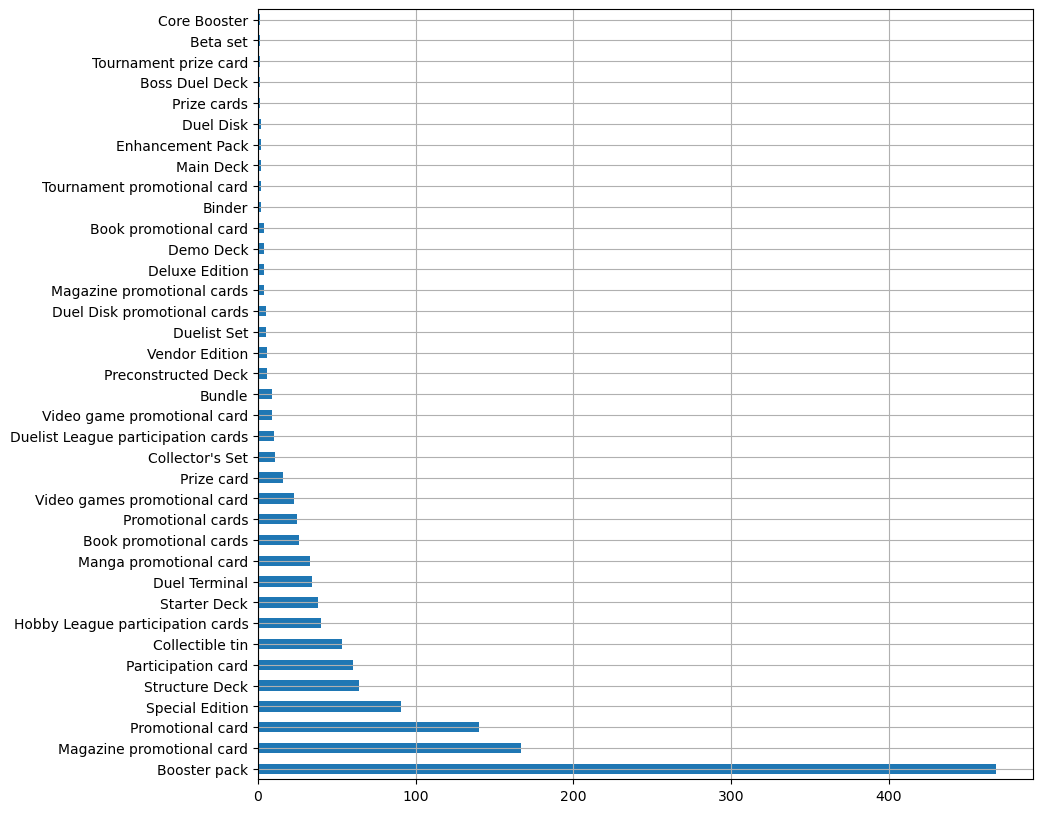

In [39]:
set_info_df['Set type'].value_counts().plot.barh(figsize = (10,10), grid=True)
plt.show()

## Release

In [40]:
print('Total number of release dates:', all_set_lists_df['Release'].nunique())

Total number of release dates: 1572


In [41]:
all_set_lists_df.groupby('Release', dropna=False).nunique()

Set  Card number  Name  Rarity  Print  Quantity  Region  Series  \
Release                                                                       
1999-03-01    1            0    40       1      0         0       1       1   
1999-03-18    1            0     1       0      0         0       1       0   
1999-04-29    1            0     1       0      0         0       1       0   
1999-05-05    1            0     1       0      0         0       1       0   
1999-05-25    1            0    40       1      0         0       1       1   
...         ...          ...   ...     ...    ...       ...     ...     ...   
2023-01-21    1           67    67       7      0         0       1       1   
2023-02-25    1          190    35       5      3         0       1       1   
2023-03-01    3            2     3       2      0         0       1       0   
2023-05-01    3            3     3       1      0         0       1       0   
NaT         119         3971  1085      26      4         2      13       9   

            Set type  Cover card  Page URL  Modification date  _merge  
Release                                                                
1999-03-01         1           0         1                  1       1  
1999-03-18         1           0         1                  1       1  
1999-04-29         1           0         1                  1       1  
1999-05-05         1           0         1                  1       1  
1999-05-25         1           0         1                  1       1  
...              ...         ...       ...                ...     ...  
2023-01-21         1           1         1                  1       1  
2023-02-25         1           0         1                  1       1  
2023-03-01         1           0         3                  3       1  
2023-05-01         1           0         3                  3       1  
NaT               13          14       111                111       3  

[1573 rows x 13 columns]

In [42]:
set_by_release = pd.DataFrame(all_set_lists_df.groupby('Release', dropna=False)['Set'].nunique())

### By year

In [43]:
all_set_lists_df.drop('Modification date', axis=1).groupby('Release', dropna=False).nunique().groupby(set_by_release.index.strftime('%Y')).sum()

Set  Card number  Name  Rarity  Print  Quantity  Region  Series  \
Release                                                                    
1999      18            0   353      10      2         0      15       8   
2000      11          268   318      21      2         2       9       7   
2001      13          311   313      30      7         4      13       5   
2002      22         1369  1197      81     10         2      21       9   
2003      51         2669  2263     123     12         0      52      12   
2004      93         6502  4687     193      6         0     108      27   
2005      75         7826  4043     160     27        18     127      28   
2006     102         5244  3048     186     22        20     125      39   
2007     126         5744  3344     272     16        18     192      53   
2008     124         5979  3248     267     21        12     194      51   
2009     117         5104  2973     278      6        14     172      40   
2010     138         6093  3322     309      8        16     204      58   
2011     144         6922  3952     318     16        18     214      55   
2012     141        10271  5425     349     17        20     218      57   
2013     146         8913  4469     340     18        24     222      68   
2014     141        12625  5705     381     38        20     225      68   
2015     136        10432  4828     353     33        12     221      69   
2016     137        10356  4755     331     39        10     210      62   
2017      67         8404  3324     198     27         6     140      29   
2018      46         5413  2129     140     26         0     103      20   
2019      50         6264  2670     160     29         0     101      17   
2020      38         6435  2143     150     34         0      85      18   
2021      65         6812  2733     241     46         6      91      38   
2022      73         8953  3673     249     66         6      96      43   
2023      14          797   343      40      8         0      14       7   

         Set type  Cover card  Page URL  _merge  
Release                                          
1999           15           1        18      15  
2000           10           4        11       9  
2001           12           7        13      13  
2002           20          14        22      19  
2003           41          29        51      38  
2004           74          45        93      59  
2005           64          37        75      49  
2006           93          42       102      67  
2007          115          54       126      94  
2008          113          50       124      95  
2009          111          54       117      93  
2010          124          53       138     103  
2011          133          53       144     105  
2012          128          53       141     111  
2013          129          69       146     108  
2014          126          60       141     107  
2015          125          57       136     103  
2016          124          59       137      97  
2017           64          35        67      54  
2018           41          28        46      41  
2019           45          25        50      43  
2020           36          27        38      36  
2021           53          36        65      49  
2022           61          42        73      56  
2023            8           4        14       8

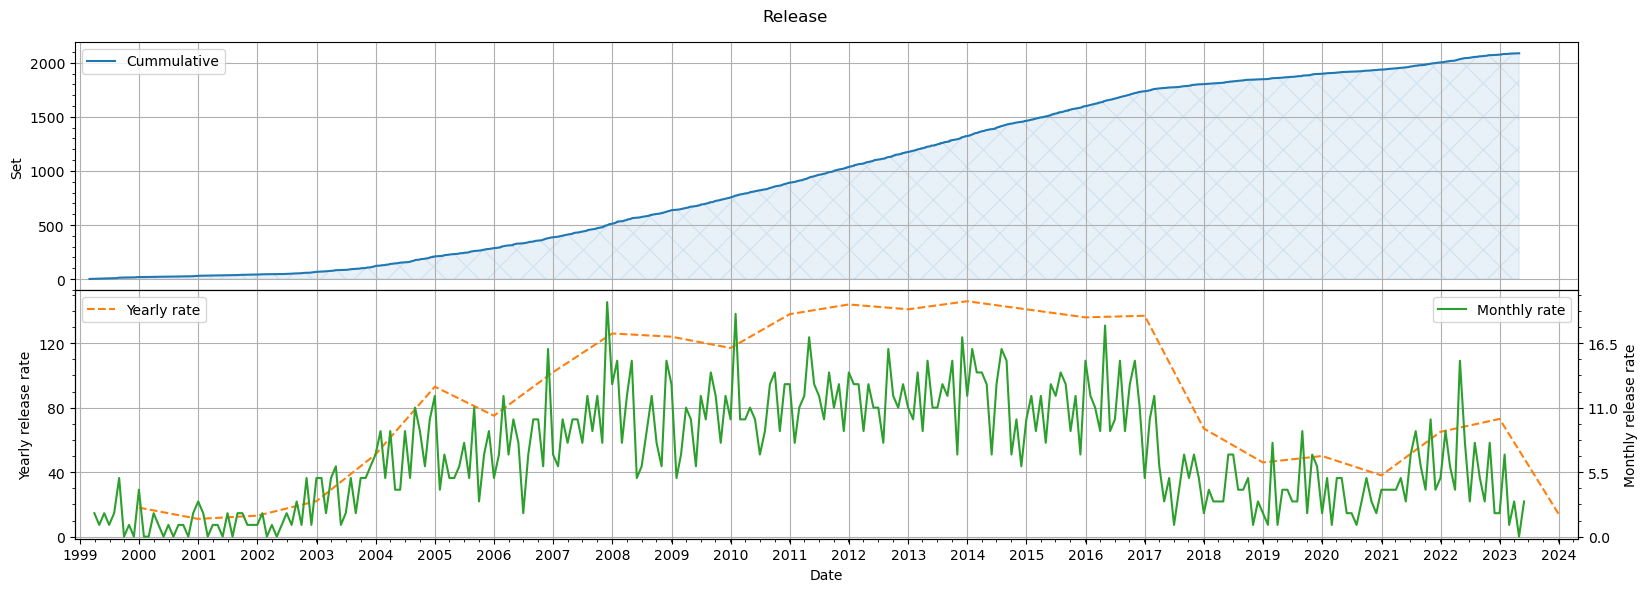

In [44]:
rate_plot(set_by_release)

### By month

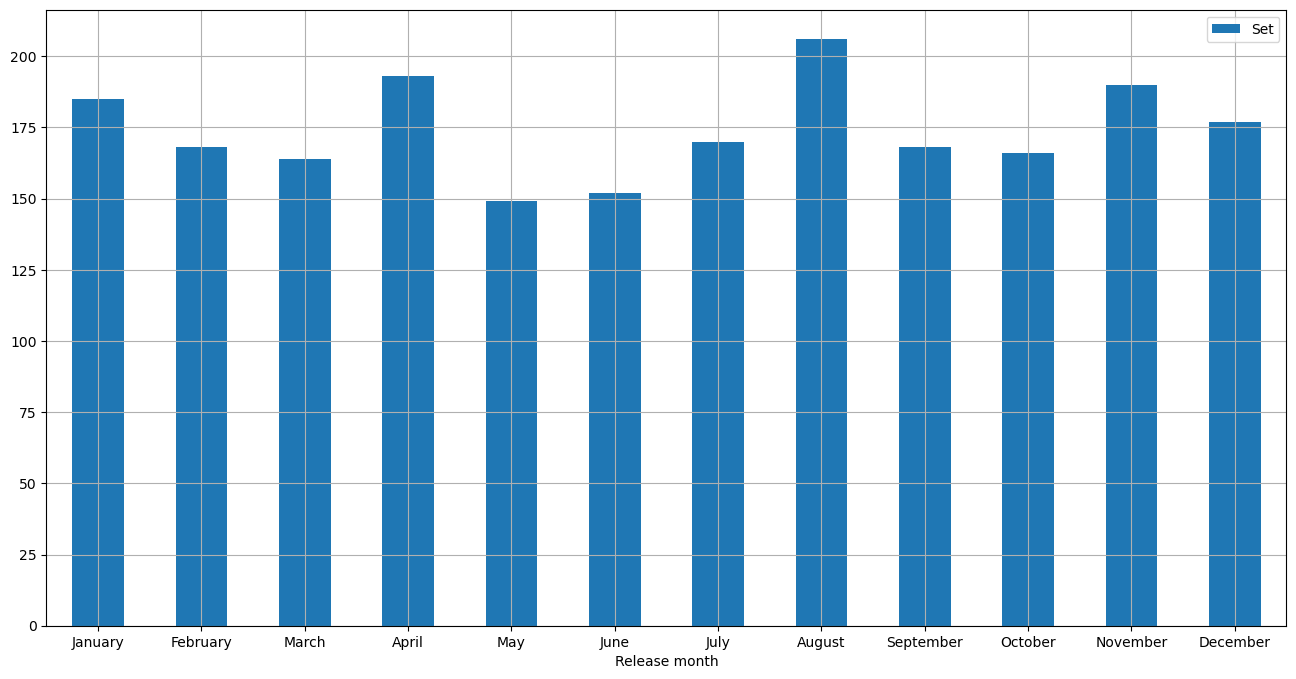

In [45]:
set_by_release.groupby(set_by_release.index.strftime('%B')).sum().sort_index(key=lambda x: pd.to_datetime(x, format='%B').month).plot.bar(figsize= (16,8), grid=True, xlabel = 'Release month', rot = 0)
plt.show()

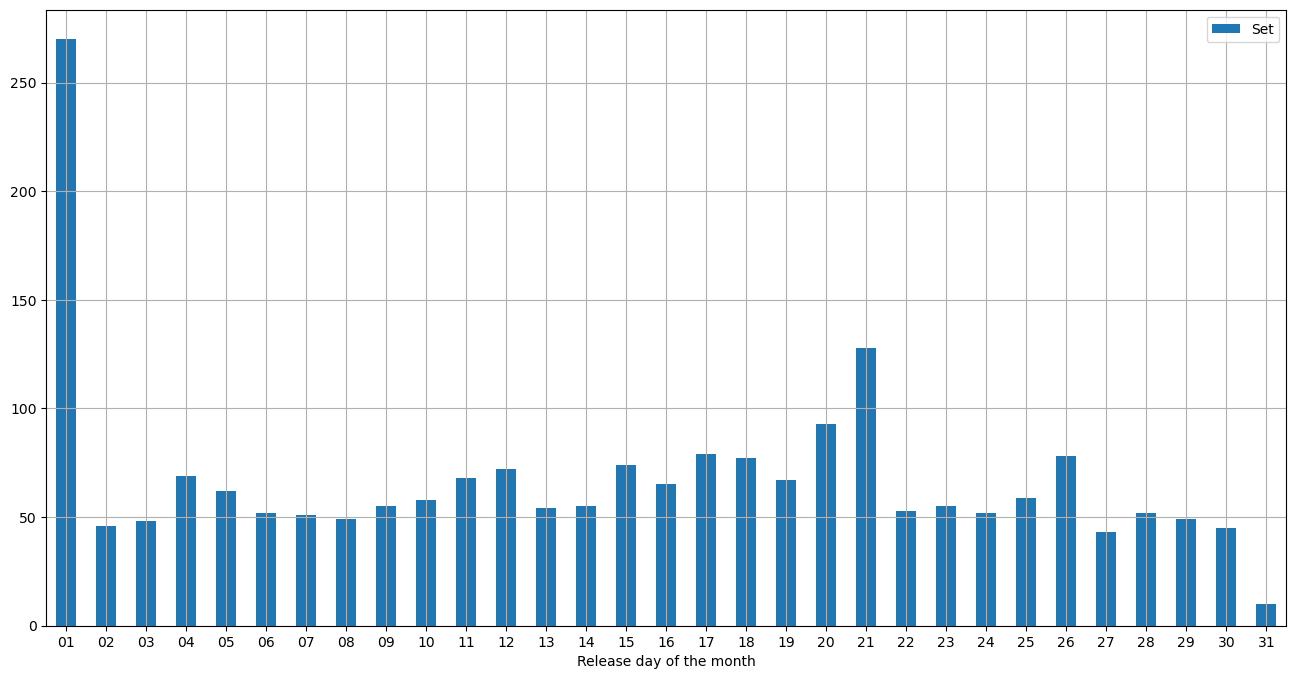

In [46]:
set_by_release.groupby(set_by_release.index.strftime('%d')).sum().plot.bar(figsize= (16,8), grid=True, xlabel = 'Release day of the month', rot = 0)
plt.show()

### By day

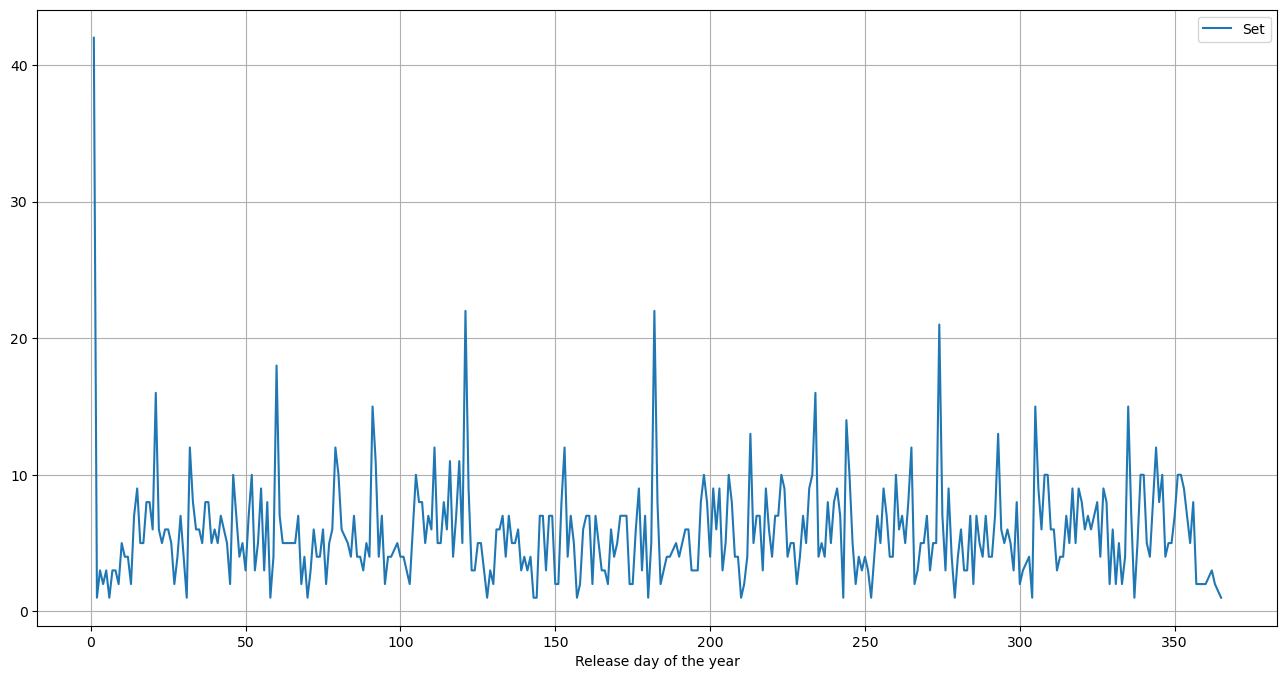

In [47]:
set_by_release.groupby(set_by_release.index.dayofyear).sum().plot(figsize= (16,8), grid=True, xlabel = 'Release day of the year')
plt.show()

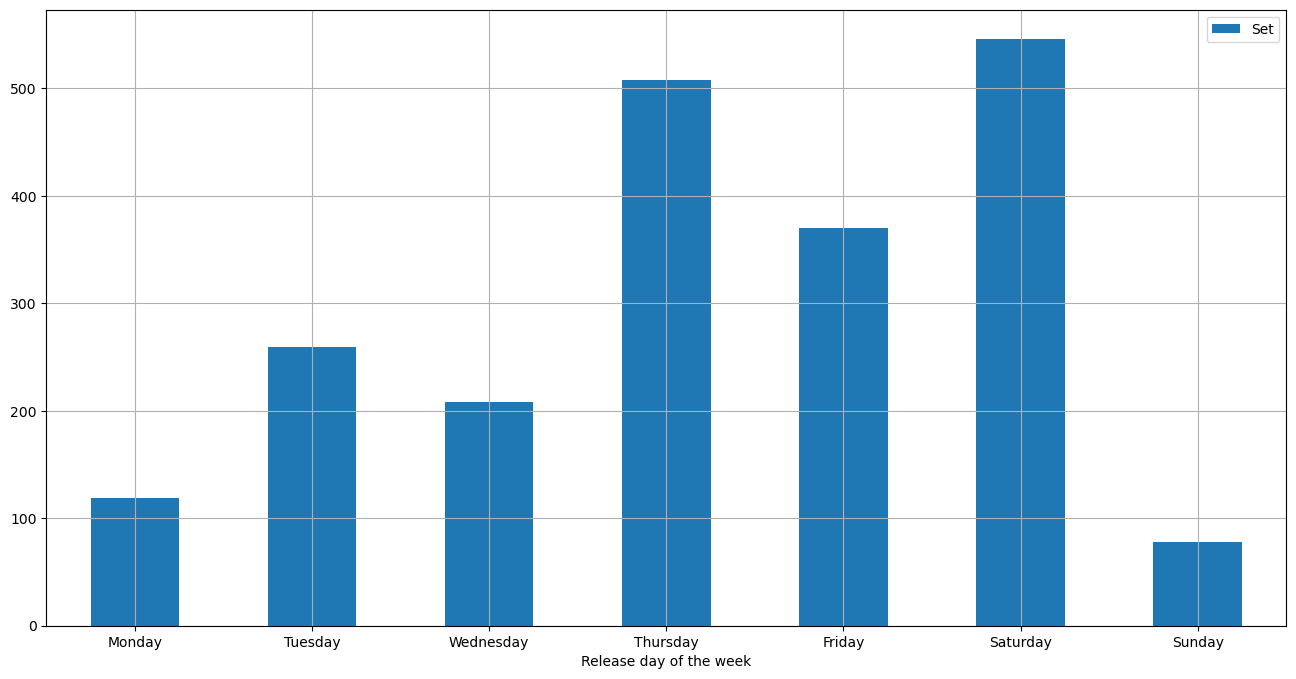

In [48]:
set_by_release_wd = set_by_release.groupby(set_by_release.index.weekday).sum()
set_by_release_wd.index = [calendar.day_name[i] for i in set_by_release_wd.index.astype(int)]
set_by_release_wd.plot.bar(figsize= (16,8), grid=True, xlabel = 'Release day of the week', rot = 0)
plt.show()

### By region

In [49]:
by_release_region = all_set_lists_df.groupby(['Region','Release']).nunique()
by_release_region

Set  Card number  Name  Rarity  Print  Quantity  Series  \
Region Release                                                               
AE     2001-06-04    1            0     2       0      0         0       0   
       2002-08-08    2          100    87       3      0         0       0   
       2002-10-24    1          144   144       5      0         0       1   
       2003-04-17    1            3     3       1      0         0       0   
       2003-06-26    1          105   105       5      0         0       1   
...                ...          ...   ...     ...    ...       ...     ...   
TC     2014-01-29    1           40    40       4      0         2       0   
       2014-05-01    1           20    20       4      0         0       1   
       2015-03-01    2           40    26       1      0         0       0   
       2015-08-29    1          100   100       6      0         0       1   
       2015-12-05    1          100   100       6      0         0       1   

                   Set type  Cover card  Page URL  Modification date  _merge  
Region Release                                                                
AE     2001-06-04         0           0         1                  1       1  
       2002-08-08         1           2         2                  2       1  
       2002-10-24         1           1         1                  1       1  
       2003-04-17         1           0         1                  1       1  
       2003-06-26         1           1         1                  1       1  
...                     ...         ...       ...                ...     ...  
TC     2014-01-29         1           1         1                  1       1  
       2014-05-01         1           0         1                  1       1  
       2015-03-01         0           0         2                  2       1  
       2015-08-29         1           1         1                  1       1  
       2015-12-05         1           1         1                  1       1  

[3172 rows x 12 columns]

In [50]:
set_by_release_region = by_release_region['Set'].unstack(0).sort_index().fillna(0).astype(int)
set_by_release_region_y = set_by_release_region.groupby(set_by_release_region.index.strftime('%Y')).sum().T
set_by_release_region_y

Release  1999  2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  \
Region                                                                      
AE          0     0     1     3     4     3     3     5     2     1     4   
AU          0     0     0     0     2     0     0     0     0     0     0   
DE          0     0     0     0     8    21    22    17    31    27    23   
EN          0     0     2     2     3    16    29    48    50    45    33   
ES          0     0     0     0     0     0     0     0     0     0     0   
EU          0     0     0     2     2     4     0     0     0     2     0   
FC          0     0     0     0     2     0     0     0     0     0     0   
FR          0     0     0     0     5    20    22    17    31    27    23   
IT          0     0     0     0     5    20    21    17    31    27    23   
JA          0     0     0     0     0     0     0     0     0     0     0   
JP         18    11    10    11    11    20    24    27    32    40    40   
KR          0     0     0     0     2     8     7    13    20    24    21   
NA          0     0     0     5    16     6     0     2     2     1     2   
PT          0     0     0     0     0    10     6     0     0     0     0   
SC          0     0     0     0     0     0     0     0     0     0     0   
SP          0     0     0     0     4    20    20    10    24    22    21   
TC          0     0     0     0     0     0     0     0     0     0     0   

Release  2010  2011  2012  2013  2014  2015  2016  2017  2018  2019  2020  \
Region                                                                      
AE          1     1     1     1     1     1     0     0     0     0     0   
AU          0     0     0     0     0     0     0     0     0     0     0   
DE         28    31    30    28    30    27    28    20    15    13    10   
EN         45    47    49    42    43    34    35    20    15    13    10   
ES          0     0     0     1     0     0     0     0     0     0     0   
EU          2     0     0     0     2     2     1     0     0     0     0   
FC          0     0     0     0     0     0     0     0     0     0     0   
FR         27    28    30    29    28    27    28    19    15    13    10   
IT         27    29    30    28    28    27    28    20    15    13    10   
JA          0     0     0     0     3     0     0     0     0     0     0   
JP         49    46    44    49    43    43    52    14    16    20    14   
KR         21    30    29    29    23    22    21    17    10    12    10   
NA          1     1     0     0     2     3     0     2     0     0     0   
PT          0     0     1    24    24    25    26    18    14    13     9   
SC          0     0     0     0     0     0     0     0     0     0     4   
SP         27    27    30    27    28    27    28    19    14    13    10   
TC          0     0     0     0     2     4     0     0     0     0     0   

Release  2021  2022  2023  
Region                     
AE          0     0     0  
AU          0     0     0  
DE          8     7     1  
EN         12    11     1  
ES          0     0     0  
EU          0     0     0  
FC          0     0     0  
FR          8     7     1  
IT          8     7     1  
JA          0     0     0  
JP         25    26    10  
KR         23    26     1  
NA          0     0     0  
PT          8     7     1  
SC          7    10     2  
SP          9     7     1  
TC          0     0     0

In [51]:
plt.figure(figsize = (20,10))
sns.heatmap(set_by_release_region_y[set_by_release_region_y>0], annot=True, fmt='g', cmap='viridis', square=True)
plt.show()

KeyboardInterrupt: 

In [ ]:
rate_subplots(set_by_release_region, title='Set releases')

### By series

In [ ]:
by_release_series = all_set_lists_df.explode('Series').groupby(['Series','Release']).nunique()
by_release_series

In [ ]:
set_by_release_series = by_release_series['Set'].unstack(0).sort_index().fillna(0).astype(int)
set_by_release_series_y = set_by_release_series.groupby(set_by_release_series.index.strftime('%Y')).sum().T
set_by_release_series_y

In [ ]:
plt.figure(figsize = (20,16))
sns.heatmap(set_by_release_series_y[set_by_release_series_y>0], annot=True, fmt='g', cmap='viridis', square=True)
plt.show()

In [ ]:
rate_subplots(set_by_release_series, title='Set releases')

### By set type

In [ ]:
by_release_type = all_set_lists_df.explode('Set type').groupby(['Set type','Release']).nunique()
by_release_type

In [ ]:
set_by_release_type = by_release_type['Set'].unstack(0).sort_index().fillna(0).astype(int)
set_by_release_type_y = set_by_release_type.groupby(set_by_release_type.index.strftime('%Y')).sum().T
set_by_release_type_y

In [ ]:
plt.figure(figsize = (20,16))
sns.heatmap(set_by_release_type_y[set_by_release_type_y>0], annot=True, fmt='g', cmap='viridis', square=True)
plt.show()

In [ ]:
rate_subplots(set_by_release_type, title='Set releases')

# Debug

This section is used for debugging the extraction of data from MediaWiki query responses

## Has nan name/number

In [ ]:
all_set_lists_df[all_set_lists_df['Name'].isna() | all_set_lists_df['Card number'].isna()]

## Has nan rarity

In [ ]:
all_set_lists_df.explode('Rarity')[all_set_lists_df.explode('Rarity')['Rarity'].isna()]['Set'].unique()

## Has quantity as print

In [ ]:
all_set_lists_df[all_set_lists_df['Print']=='2']

In [ ]:
all_set_lists_df[all_set_lists_df['Set']=='EX Starter Box']

## Has nan release

In [ ]:
all_set_lists_df[all_set_lists_df['Release'].isna()]['Set'].unique()

## Has print as rarity

In [ ]:
all_set_lists_df.explode('Rarity')[(all_set_lists_df['Rarity'].explode() == 'New') | (all_set_lists_df['Rarity'].explode() == 'Reprint')]['Set'].unique()

## Merge failed

In [ ]:
all_set_lists_df[all_set_lists_df['_merge']=='right_only']

In [ ]:
len(all_set_lists_df[all_set_lists_df['_merge']=='left_only']['Set'].unique())

In [ ]:
all_set_lists_df['Set'].unique()

In [ ]:
all_set_lists_df[all_set_lists_df['Set'].str.contains("Marik")].dropna()

 # Epilogue

In [ ]:
footer()

## HTML export

In [ ]:
# May need to sleep for a few seconds after saving
save_notebook()

In [ ]:
! jupyter nbconvert Sets.ipynb --output-dir='../' --to=HTML --TagRemovePreprocessor.enabled=True --TagRemovePreprocessor.remove_cell_tags='exclude' --TemplateExporter.exclude_input=True --TemplateExporter.exclude_input_prompt=True --TemplateExporter.exclude_output_prompt=True

## Git

In [ ]:
! git add "../*[Ss]ets[._]*"

In [ ]:
! git commit -m {"'Sets update-" + timestamp.strftime("%d%m%Y")+"'"}